# Final - Problem 2 (Subgradient Method)

Consider the following functions:
$$f_1(x,y)=|x-y+5|, (x,y)\in \mathbb{R}^2.$$
$$f_2(x,y)=|x+y+1|, (x,y)\in \mathbb{R}^2.$$
$$f=f_1+f_2$$
- (c) Write a Python function to find a subgradient of} $f$ at $(x,y)$.
- (d) Use the subgradient method to find an absolute minimizer of the function $f$.

In [2]:
import numpy as np

(2c) Python function that finds the subgradient of $f$ at $(x,y)$.

In [13]:
def subf1(x,y):
    if x-y+5>0:
        return np.array([1,-1])
    elif x-y+5<0:
        return np.array([-1,1])
    else:
        return np.array([0,0])
    
def subf2(x,y):
    if x+y+1>0:
        return np.array([1,1])
    elif x+y+1<0:
        return np.array([-1,-1])
    else:
        return np.array([0,0])

def subf(x,y):
    return subf1(x,y) + subf2(x,y)

(2d) Python code implementing the subgradient method to find the absolute minimizer of the function $f$.

In [22]:
def f(x, y):
    return abs(x - y + 5) + abs(x + y + 1)

def subgradient_method(initial_point, step_size, max_iter=100000, tol=1e-6):
    x, y = initial_point
    for k in range(max_iter):
        grad = subf(x, y)
        x_new = x - step_size * grad[0]
        y_new = y - step_size * grad[1]
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            print(f"Converged in {k+1} iterations.")
            return x_new, y_new
        x, y = x_new, y_new
    print("Initial point used:", initial_point)    
    print("Maximum number of iterations reached.")
    return x, y

# Parameters for the subgradient method
initial_point = (3, 7)
step_size = 0.01

# Find the minimizer
minimizer = subgradient_method(initial_point, step_size)
print("Minimizer:", minimizer)
print("Minimum value of f:", f(minimizer[0], minimizer[1]))

Initial point used: (3, 7)
Maximum number of iterations reached.
Minimizer: (-3.0000000000000044, 2.000000000000062)
Minimum value of f: 1.2434497875801753e-13


# Final - Problem 3 (Sylvester Smallest Enclosing Ball)

Given $m$ points $a_1,a_2,\dots,a_m\in\mathbb{R}^n,$ define the function $$f(x)=\max\{||x-a_1||^2,||x-a_2||^2,\dots,||x-a_m||^2\}, x\in \mathbb{R}^n.$$ To find the smallest ball that encloses all of the given points, we can solve the following optimization problem: $$\textrm{minimize }f(x), \ x\in\mathbb{R}^n.$$ This problem is known as the Sylvester smallest enclosing ball problem. If $x_0$ is an optimal solution to the problem and $r=f(x_0),$ then the ball with center $x_0$ and radius $r$ is the ball we are looking for.

Use the subgradient method and the model above to find the smallest circle that encloses the following points in $\mathbb{R}^2.$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data set (10 points) in R^2:
[[ 1.3  2.4]
 [-0.7  3.1]
 [ 2.8 -1.5]
 [-2.9  0.6]
 [ 1.7 -2.8]
 [-1.4 -3.2]
 [ 3.3  1.1]
 [-3.7 -0.9]
 [ 0.9  3.7]
 [-2.2  2.3]]


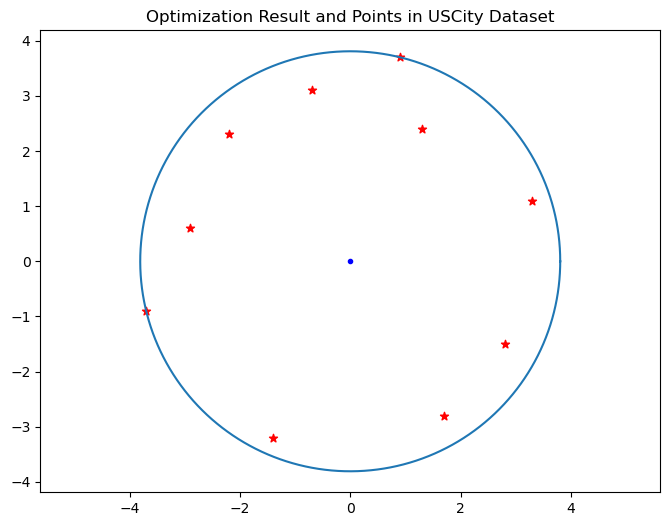

Optimized point z (center): [0 0], Minimized maximum distance V: 3.8078865529319543


In [34]:
def f_value (B,x):
    max_distance = np.linalg.norm(x-B[0,:])
    n = B.shape[0]
    
    for i in range(n):
        distance = np.linalg.norm(x-B[i,:])
        max_distance = max(max_distance, distance)
    return max_distance

def sub_d(B,x):
    n = B.shape[0]
    W = np.zeros(n)
    for l in range(n):
        W[l] = np.linalg.norm(x-B[1,:])
    p = np.argmax(W)
    if W[p] == 0:
        z = 0
    else:
        z = (x-B[p,:])/np.linalg.norm(x-B[p,:])
    return z

def draw_disk(center, r):
    t = np.linspace(0, 2*np.pi, 1000)
    x = r * np.cos(t) + center[0]
    y = r * np.sin(t) + center[1]
    plt.figure(figsize=(8, 6))
    plt.plot(x,y)
    plt.axis('equal')
    
def main():
    df = pd.read_excel('R2data.xlsx')
    data = df.to_numpy() 
    A = []
    for row in data:
        array = np.array([row[0], row[1]])
        A.append(array)
    A = np.array(A)
    print(f"Data set (10 points) in R^2:")
    print(A)
    x = np.array([0, 0])
    K = 5000
    V = f_value(A, x)
    z = x.copy()
    for i in range(K):
        x = x - 0.01 * sub_d(A, x)
        if f_value(A, x) <= V:
            V = f_value(A, x)
            z = x.copy()
    draw_disk(z, V)
    plt.scatter(A[:, 0], A[:, 1], c='r', marker='*')
    plt.scatter(z[0], z[1], c='b', marker='.')
    plt.title("Optimization Result and Points in USCity Dataset")
    plt.show()
    print(f"Optimized point z (center): {z}, Minimized maximum distance V: {V}")

if __name__ == "__main__":
    main()
